In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 16

In [4]:
path = 'Data'

In [5]:
fnames = get_image_files(path)
fnames[:5]

[WindowsPath('Data/Brownbasmati_1.JPG'),
 WindowsPath('Data/Brownbasmati_10.JPG'),
 WindowsPath('Data/Brownbasmati_100.JPG'),
 WindowsPath('Data/Brownbasmati_101.JPG'),
 WindowsPath('Data/Brownbasmati_102.JPG')]

In [6]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.JPG$'

In [7]:
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

C:\Users\Ryuk\anaconda3\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
C:\Users\Ryuk\anaconda3\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
C:\Users\Ryuk\anaconda3\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

C:\Users\Ryuk\anaconda3\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
C:\Users\Ryuk\anaconda3\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
C:\Users\Ryuk\anaconda3\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for

In [13]:
print(data.classes)
len(data.classes),data.c

['Brownbasmati', 'Kolamrice', 'Masoordal', 'Moongdal', 'Parmalrice', 'Toordal', 'Udatdalblack', 'Udatdalwhite', 'Whitebasmati', 'Wildrice']


(10, 10)

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [15]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.109475,0.063916,0.976415,10:38
1,0.556024,0.019580,0.990566,09:34
2,0.339767,0.006308,0.995283,08:59
3,0.245051,0.007472,1.000000,08:50


In [17]:
learn.save('stage-1')

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

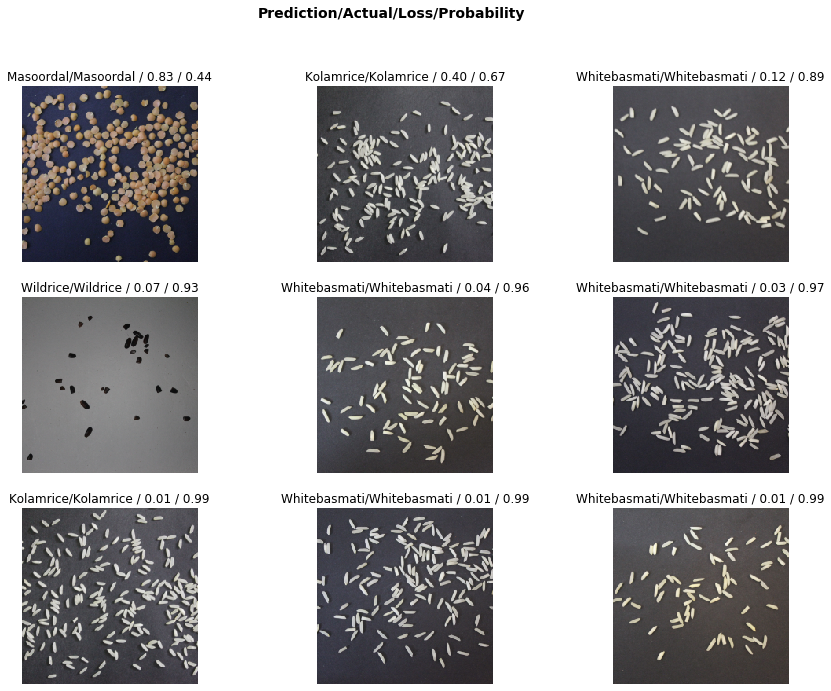

In [19]:
interp.plot_top_losses(9, figsize=(15,11))

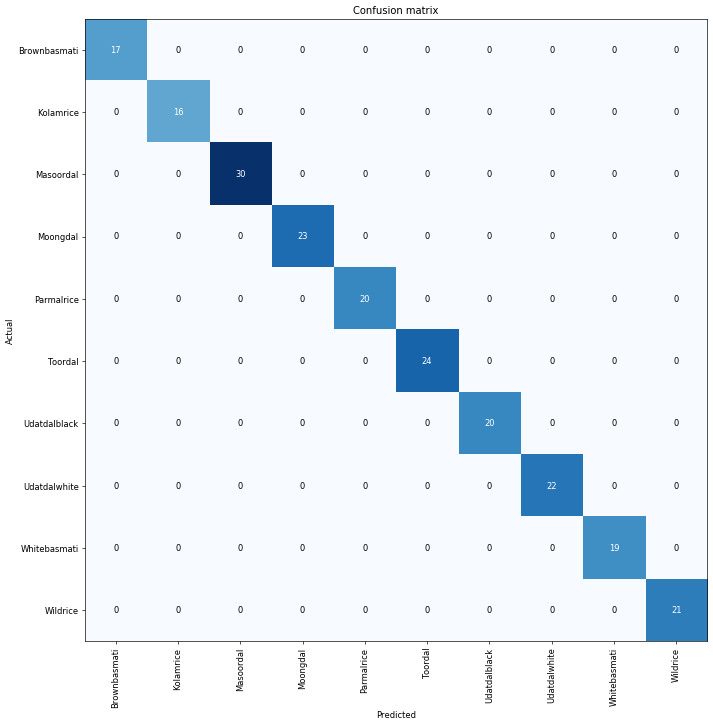

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [21]:
interp.most_confused(min_val=2)

[]

In [22]:
learn.unfreeze()

In [23]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.580575,0.010609,0.995283,08:50


In [24]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (852 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Brownbasmati,Brownbasmati,Brownbasmati,Brownbasmati,Brownbasmati
Path: Data;

Valid: LabelList (212 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Kolamrice,Masoordal,Moongdal,Toordal,Udatdalblack
Path: Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


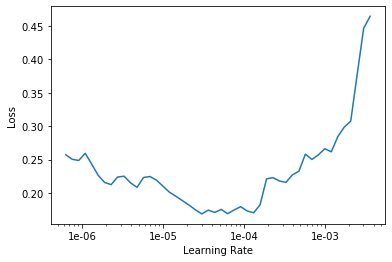

In [26]:
learn.recorder.plot()

In [27]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-05,1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,0.149768,0.098491,0.981132,09:20
1,0.195853,0.009548,0.995283,09:27


In [28]:
path1 = 'Dataset\Samples\Black Udat (2).JPG'

In [29]:
data1 = ImageDataBunch.from_name_re(path1, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

In [30]:
learn.get_preds(path1)

[tensor([[1.0000e+00, 1.8793e-11, 2.0772e-10,  ..., 8.3841e-12, 4.1318e-09,
          4.6791e-11],
         [1.0000e+00, 1.9194e-11, 3.0804e-10,  ..., 7.4767e-12, 3.3931e-09,
          2.2942e-10],
         [1.0000e+00, 9.3252e-13, 3.1082e-11,  ..., 3.7768e-12, 1.9675e-10,
          1.3751e-11],
         ...,
         [4.6931e-08, 2.5903e-07, 4.5021e-08,  ..., 8.3146e-07, 2.5962e-09,
          1.0000e+00],
         [3.3486e-08, 3.6808e-07, 1.5561e-07,  ..., 1.3636e-06, 2.9781e-09,
          1.0000e+00],
         [3.4784e-06, 1.5171e-06, 9.5046e-07,  ..., 2.8150e-05, 3.7200e-08,
          9.9996e-01]]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 